<h1>Getting the Environment Set Up</h1>

We will be using tensorflow to create and use our neural networks. Throughout this notebook, we will see just how easy it is to make a working neural network that has a surprisingly high accuary!

In [14]:
import tensorflow as tf
from tensorflow import keras

## Setting up Weights and Biases

In [ ]:
!pip install -q wandb
import wandb
!wandb login --relogin "YOUR_KEY_HERE"

<h1>Managing our Images</h1>

In [15]:
# parameters
input_shape = (28, 28) # the image is 28x28
num_classes = 10 # 10 labels
num_epochs = 5 # 5 training iterations, we bump this down because the model takes longer to train

# TODO You can change to the numbers MNIST dataset if you'd like to see how it works on different images
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
           "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot")

# 60,000 images with each image being 28 by 28 pixels
train_images.shape

(60000, 28, 28)

Each image is represented by a 2-D array where each number in the list represents the brightness of the pixel

In [16]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

For our CNN model, we will need this to be a 3-D array for it to work with tensorflow properly. Below we will reshape it to be 3D and then print it out again

In [17]:
train_images = train_images.reshape((60000,28,28,1))
# This just has a massive output, if you want to see the new shape, uncomment it and run this block
# train_images[0]

We will also need to do this for our test images

In [18]:
test_images = test_images.reshape((10000, 28, 28, 1))

That wall of numbers isn't very easy to understand to our brains however. Lets go ahead and display a few of the images from the dataset with matplotlib. If you want to read more about matplot lib, you can go here: https://matplotlib.org/stable/users/index

In [19]:
def show_imgs():
    (x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
    x_train = x_train / 255.0
    images = x_train[:10]
    fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 2))
    for i in range(10):
        axes[i].imshow(np.squeeze(images[i]), cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(str(y_train[i]))
    plt.show()


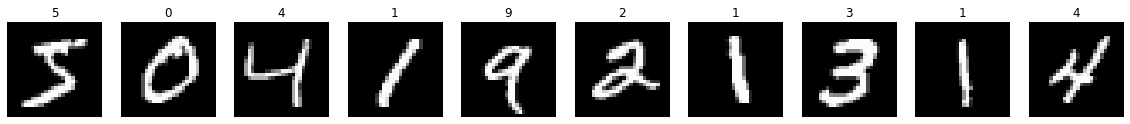

In [20]:
show_imgs()

<h1>Creating Our Model</h1>

Tensorflow lets us create a model super easily. A "Dense" layer is just a layer that is fully connected to the next layer, this is the basic type of layer that we are familiar with. Then all we need to do is specify how many neurons there should be in the given layer and tensorflow figures out the rest.

In [21]:
# The parameters in each of these Conv2D layers are as follows:
# layers.Conv2D(Output_size, Stride, activation, input_shape)
# Stride is just how far the square of relevant pixels moves between layers. 
# Simply put, for this model, the model looks at a 4x4 square of pixels and
# then moves 4 pixels to the left before checking the next 4x4 box of pixels
def create_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max Pooling just grabs the largest number in a specified area and uses that for the whole area
    # below we are looking at a 2x2 square and using the largest number in that square as the value for the whole square

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))

    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(56, (3, 3), activation='relu'))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10))

    return model

In [22]:
model = create_model()
# The optimizer is just an algorithm that helps the AI learn faster
# The loss is Sparse Categorical Crossentropy, the name is scary but it just means that 
# the outputs are converted to percentages and then compared to the expected output
# Metrics = accuracy means that we only care about how close the answer was to the actual answer 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 56)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 56)          28280     
                                                                 
 flatten (Flatten)           (None, 504)               0

<h1>Training our Model</h1>

Tensorflow makes training easy. All we need to do is give it the input data and the expected outputs with the number of epochs to train for and it will handle the rest!

In [ ]:
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 512,
        "activation_1": "relu",
        "dropout": random.uniform(0.01, 0.80),
        "layer_2": 10,
        "activation_2": "softmax",
        "optimizer": "sgd",
        "loss": "sparse_categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 8,
        "batch_size": 256
    }
)

model.fit(train_images, train_labels, epochs=num_epochs)
wandb.finish()

Epoch 1/5
1621/1875 [========================>.....] - ETA: 9s - loss: 0.5782 - accuracy: 0.8147

<h1>Evaluating our Model</h1>

Evaluating out model with tensorflow is super easy. We can see blow that we were able to get about a 90% accuracy on images that our model has never seen before!

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Accuracy = {test_accuracy} on {test_images.shape[0]} images')

But those numbers don't really show the whole story. For example, we do not know which images it is struggling on specifically. To show off our model and give us a chance to see where it is struggling, we will show an image and make a prediction on it. First, we're going to make predictions on the entire test dataset to show off later

In [ ]:
predictions = model.predict(test_images)

In [ ]:
# pred = model.predict(np.array(test_images[0]))
test_images[0].shape
np.array(test_images[0]).shape

Now, we'll generate a random number and use it to show off the corresponding image, prediction and actual label. This allows us to re-run this block over and over to see a range of predictions

In [ ]:
import random
rand = random.randint(0,9999)

plt.subplot()
plt.axis('off')
plt.imshow(test_images[rand], cmap=plt.cm.binary)
plt.show()

prediction = np.argmax(predictions[rand])
actual = class_names[test_labels[rand]]
print(f'Our model predicted: {class_names[prediction]}')
print(f'The actual answer was: {actual}')